In [11]:
import serial # damit ich von Serial-Connection Daten lesen kann 
import time # weil wir Zeit zum Warten brauchen
import pandas as pd # zum Verarbeiten von time series
import matplotlib.pyplot as plt # für Heatmaps
import seaborn as sns # für Heatmaps
import numpy as np # für Fitfunktion
from scipy.optimize import curve_fit # für Fiftfunktion

### Code DEMO

In [12]:
#Definieren der Spaltennamen
column_names = ['hDeg', 'vDeg', 'AmbientT', 'ObjectT', 'Clear', 'Red', 
                'Green', 'Blue', 'IR']

In [22]:
dfDemo = pd.read_csv('./Demo Dataframe.csv', names = column_names)

In [23]:
def quotient_IR_clear(row):
    return row["IR"] / row["Clear"] if row["Clear"] != 0 else np.inf

def quotient_red_blue(row):
    return row["Red"] / row["Blue"] if row["Blue"] != 0 else np.inf

In [24]:
dfDemo["quotient IR clear"] = dfDemo.apply(quotient_IR_clear, axis=1)
dfDemo["quotient Red Blue"] = dfDemo.apply(quotient_red_blue, axis=1)

In [25]:
dfDemo

,hDeg,vDeg,AmbientT,ObjectT,Clear,Red,Green,Blue,IR,quotient IR clear,quotient Red Blue
0,0.0,45.0,23.11,23.57,306.0,112.0,148.0,125.0,172.0,0.562092,0.896000
1,0.0,50.0,23.09,23.59,311.0,112.0,149.0,127.0,165.0,0.530547,0.881890
2,0.0,55.0,23.15,23.59,310.0,107.0,147.0,125.0,147.0,0.474194,0.856000
3,0.0,60.0,22.99,23.59,322.0,107.0,152.0,130.0,135.0,0.419255,0.823077
4,0.0,65.0,23.09,23.56,329.0,107.0,156.0,133.0,140.0,0.425532,0.804511
...,...,...,...,...,...,...,...,...,...,...,...
356,180.0,115.0,22.57,23.61,1755.0,681.0,782.0,648.0,754.0,0.429630,1.050926
357,180.0,120.0,22.51,23.69,1807.0,699.0,794.0,667.0,763.0,0.422247,1.047976
358,180.0,125.0,22.53,23.61,1841.0,705.0,803.0,686.0,767.0,0.416621,1.027697
359,180.0,130.0,22.53,23.61,1864.0,704.0,804.0,702.0,771.0,0.413627,1.002849


In [26]:
# Heatmap ohne Normalisierung auf das Maximum - selbe Funktion wie oben nur nicht 
# min und max aller Daten abgefragt und auf die normiet 

def get_heatmap(input_dataframe: pd.DataFrame, values_column: str, 
                plot_title: str, colormap: str): 
    
    heatmap_data = input_dataframe.pivot(index = 'vDeg', 
                                         columns = 'hDeg', values = values_column)
    plt.figure(figsize= (6,5))
    ax = sns.heatmap(heatmap_data, annot = False, cmap = colormap)
    ax.invert_yaxis()
    plt.title(plot_title)
    plt.show()

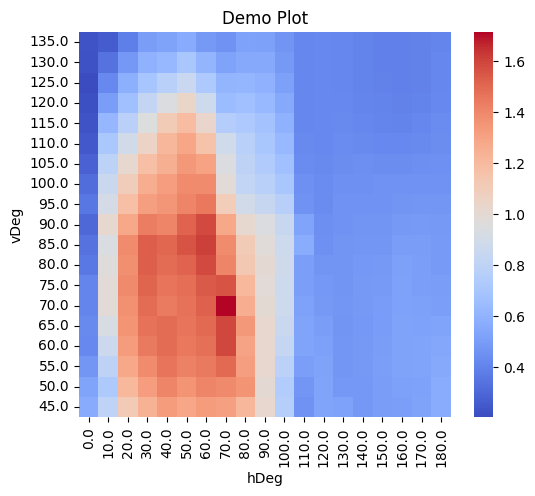

In [27]:
get_heatmap(dfDemo, "quotient IR clear", "Demo Plot", "coolwarm")

In [ ]:
get_heatmap(dfDemo, "Clear", "Demo Plot", "cividis")

In [ ]:
get_heatmap(dfDemo, "IR", "Demo Plot", "hot")

### Gesamtcode

In [2]:
#Definieren der Spaltennamen
column_names = ['hDeg', 'vDeg', 'AmbientT', 'ObjectT', 'Clear', 'Red', 
                'Green', 'Blue', 'IR']

In [3]:
# Einlesen aller erstellter csv Dateien als unterschiedlich benannte Dataframes
# die einzelnen Spalten werden dabei nach den oben benannten Strings 
# für die Column names benannt

dfK5 = pd.read_csv('./Kerze_5cm.csv', names = column_names)
dfK10 = pd.read_csv('./Kerze_10cm.csv', names = column_names)
dfK15 = pd.read_csv('./Kerze_15cm.csv', names = column_names)
dfK20 = pd.read_csv('./Kerze_20cm.csv', names = column_names)
dfK30 = pd.read_csv('./K_30cm.csv', names = column_names)
dfK50 = pd.read_csv('./K_50cm.csv', names = column_names)
dfK100 = pd.read_csv('./K_100cm.csv', names = column_names)
dfK350 = pd.read_csv('./K_350cm.csv', names = column_names)

dfLED5 = pd.read_csv('./LED_5cm.csv', names = column_names)
dfLED10 = pd.read_csv('./LED_10cm.csv', names = column_names)
dfLED15 = pd.read_csv('./LED_15cm.csv', names = column_names)
dfLED100 = pd.read_csv('./LED_100cm.csv', names = column_names)


df15_beide = pd.read_csv('./beide_15cm.csv', names = column_names)



In [4]:
dataframe_liste = [dfK5, dfK10, dfK15, dfK20, dfK30, dfK50, dfK100, dfK350, 
                   dfLED5, dfLED10, dfLED15, dfLED100, df15_beide, dfDemo]

In [5]:
dataframe_liste_without_5cm = [dfK10, dfK15, dfK20, dfK30, dfK50, dfK100, dfK350, 
                    dfLED10, dfLED15, dfLED100, df15_beide, dfDemo]

#### Intensität der aufgenommenen Signale als Funktion des Abstandes vom Sensor zum Experiment 

In [6]:
# Listen erstellen, in denen später die Maximalwerte 
# aus jeder Heatmap gespeichert werden sollen 

max_IR_liste_kerze = []
max_clear_liste_kerze = []
max_IR_liste_LED = []
max_clear_liste_LED = []

In [7]:
# Maximalwerte der Kerzen-Messungen in die Listen 

for i in range(8):
    df = dataframe_liste[i]
    max_IR = df['IR'].max()                 # Maximum aus der IR Spalte 
    max_clear = df['Clear'].max()           # Maximum aus der Clear Spalte
    max_IR_liste_kerze.append(max_IR)       # Maxima der Messreihen zu Listen 
    max_clear_liste_kerze.append(max_IR)

In [8]:
# Maximalwerte der LED-Messungen in die Listen

for i in range(8,13):
    df = dataframe_liste[i]
    max_IR = df['IR'].max()
    max_clear = df['Clear'].max()
    max_IR_liste_LED.append(max_IR)
    max_clear_liste_LED.append(max_IR)

In [9]:
# Listen in Arrays umwandeln (für Fitfunktionen) und zum Test einen ausgeben lassen

max_IR_array_kerze = np.array(max_IR_liste_kerze)
max_clear_array_kerze = np.array(max_clear_liste_kerze)
max_clear_array_kerze

max_IR_array_LED = np.array(max_IR_liste_LED)
max_clear_array_LED = np.array(max_clear_liste_LED)


In [10]:
# Distanzen bei denen wir gemessen haben jeweils in Array eintragen 

distance_array_kerze = np.array([5, 10, 15, 20, 30, 50, 100, 350])
distance_array_LED = np.array([5,10,15,100])

In [11]:
# Fitfunktion 1/r^2 vordefinieren

def inverse_square_func(r,a):
    return a/r**2

# Funktion definieren, die die Funktion, mit der gefittet werden, soll, 
# die x- und y-Daten und Labels für einen Plot als Input nimmt
# und einen Plot mit den Werten und der eingezeichneten Fit-Funktion erstellt 
def plot_fit(function, x_values: np.array, y_values: np.array, x_label: str, 
             y_label: str, Title: str):
    # Fit-Funktion mit den Inputs, die man dem plot_fit Befehl übergibt
    params, _ = curve_fit(function, x_values, y_values)             

    x_fit = np.linspace(x_values.min(), x_values.max(), 100)        
    y_fit = function(x_fit, *params)                               

    plt.scatter(x_values, y_values, label='Data points')
    plt.plot(x_fit, y_fit, color='orange', label='Fit Function')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(Title)
    plt.show()

In [ ]:
# Jetzt kann man die Funktion aufrufen und damit den Fit und die Datenpunkte plotten
plot = plot_fit(inverse_square_func, distance_array_kerze, max_IR_array_kerze, 
                'distance / cm ', 'max IR measurement', 'IR and Distance Kerze')

In [ ]:
plot_fit(inverse_square_func, distance_array_LED, max_IR_array_LED, 
         'distance / cm ', 'max IR measurement', 'IR and Distance LED')

In [ ]:
plot_fit(inverse_square_func, distance_array_kerze, max_clear_array_kerze, 
         'distance / cm ', 'max IR measurement', 'Clear and Distance Kerze')

In [ ]:
plot_fit(inverse_square_func, distance_array_LED, max_clear_array_LED, 
         'distance / cm ', 'max IR measurement', 'Clear and Distance LED')

#### Heatmaps der Messsignale

In [49]:
# Alle Datensätze zusammenführen, um später die globalen Min und Max Werte von Clear 
# und IR herauszufinden für Skalierung der Farbskala in der Colormap 

all_data = pd.concat([dfK5, dfK10, dfK15, dfK20, dfK30, dfK50, dfK100, dfK350, dfLED5,
                       dfLED10, dfLED15, dfLED100, df15_beide])

In [19]:
all_data_without_5cm = pd.concat([dfK10, dfK15, dfK20, dfK30, dfK50, dfK100, dfK350,
                       dfLED10, dfLED15, dfLED100, df15_beide])

In [20]:
# Definieren einer Funktion zum Erstellen von Heatmaps mit den gegebenen Inputs
# wo ': str' o.Ä. steht, haben wir in der Funktion vermerkt, um welchen Datentyp es sich 
# beim Input handelt, weil man das sonst leicht vergisst 

def get_normalized_heatmap(input_dataframe: pd.DataFrame, values_column: str,
                            plot_title: str, colormap: str):
     
    # aus dem input df die columns herausnehmen, die man braucht
    heatmap_data = input_dataframe.pivot(index = 'vDeg', columns = 'hDeg', 
                                         values = values_column) 
    
    # globale Minima und Maxima aller Werte bestimmen
    global_min = all_data_without_5cm[values_column].min().min()
    global_max = all_data_without_5cm[values_column].max().max() 
    plt.figure(figsize= (6,5))
    ax = sns.heatmap(heatmap_data, annot = False, cmap = colormap, 
                     vmin = global_min, vmax = global_max) # heatmap selbst
    ax.invert_yaxis()
    plt.title(plot_title)
    plt.show()

In [ ]:
for i in range(0,13):
    name = namen_messungen_liste_without_5cm[i]
    plot = get_normalized_heatmap(dataframe_liste_without_5cm[i], 
                                  'Clear', name, 'cividis')

In [22]:
# Heatmap ohne Normalisierung auf das Maximum - selbe Funktion wie oben nur nicht 
# min und max aller Daten abgefragt und auf die normiet 

def get_heatmap(input_dataframe: pd.DataFrame, values_column: str, 
                plot_title: str, colormap: str): 
    
    heatmap_data = input_dataframe.pivot(index = 'vDeg', 
                                         columns = 'hDeg', values = values_column)
    plt.figure(figsize= (2,1))
    ax = sns.heatmap(heatmap_data, annot = False, cmap = colormap)
    ax.invert_yaxis()
    plt.title(plot_title)
    plt.show()

In [13]:
# Funktionen definieren, um qoutienten zwischen gemessenem IR 
# und gemessenem Clear Light Wert
# bzw. zwischen Rotem und Blauem Licht zu bestimmen 
# manchmal Division durch 0 -> in dem Fall dann mit 
# np.inf einen 'unendlichen' Wert andeuten 

def quotient_IR_clear(row):
    return row["IR"] / row["Clear"] if row["Clear"] != 0 else np.inf

def quotient_red_blue(row):
    return row["Red"] / row["Blue"] if row["Blue"] != 0 else np.inf

In [14]:
# Hinzufügen der beiden Columns mit den berechneten Verhältnissen zu allen Dataframes

for df in dataframe_liste:
    df["quotient IR clear"] = df.apply(quotient_IR_clear, axis=1)
    df["quotient Red Blue"] = df.apply(quotient_red_blue, axis=1)

In [15]:
namen_messungen_liste = ("Kerze 5 cm ", "Kerze 10 cm", "Kerze 15 cm ", "Kerze 20 cm ", 
                         "Kerze 30 cm", "Kerze 50 cm", "Kerze 100 cm ", "Kerze 350 cm", 
                         "LED 5 cm", "LED 10 cm", "LED 15 cm", "LED 100 cm", "Kerze + LED 15 cm" )
namen_messungen_liste_without_5cm = ("Kerze 10 cm", "Kerze 15 cm ", "Kerze 20 cm ", 
                                     "Kerze 30 cm", "Kerze 50 cm", "Kerze 100 cm ", "Kerze 350 cm", 
                                     "LED 10 cm", "LED 15 cm", "LED 100 cm", "Kerze + LED 15 cm" )

In [17]:
dfK10

,hDeg,vDeg,AmbientT,ObjectT,Clear,Red,Green,Blue,IR,quotient IR clear,quotient Red Blue
0,0.0,45.0,26.12,26.43,17.0,15.0,13.0,11.0,78.0,4.588235,1.363636
1,0.0,50.0,25.81,26.43,15.0,13.0,12.0,10.0,76.0,5.066667,1.300000
2,0.0,55.0,25.85,26.43,14.0,12.0,11.0,9.0,71.0,5.071429,1.333333
3,0.0,60.0,26.15,26.45,13.0,11.0,10.0,8.0,66.0,5.076923,1.375000
4,0.0,65.0,26.39,26.45,13.0,11.0,9.0,8.0,63.0,4.846154,1.375000
...,...,...,...,...,...,...,...,...,...,...,...
356,180.0,115.0,25.05,26.57,8.0,7.0,6.0,5.0,46.0,5.750000,1.400000
357,180.0,120.0,24.99,26.57,8.0,6.0,6.0,5.0,43.0,5.375000,1.200000
358,180.0,125.0,24.93,26.55,8.0,6.0,6.0,5.0,41.0,5.125000,1.200000
359,180.0,130.0,25.01,26.55,7.0,6.0,5.0,5.0,36.0,5.142857,1.200000


In [ ]:
# über alle Datensätze iterieren und die Object Temperature als Heatmap plotten 

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_heatmap(dataframe_liste[i], 'ObjectT', name, 'hot')

In [ ]:
# über alle Datensätze iterieren und IR als Heatmap plotten - normalisiert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_normalized_heatmap(dataframe_liste[i], 'Clear', name, 'cividis')

In [ ]:
# über alle Datensätze iterieren und IR als Heatmap plotten 
# - NICHT normalisiert auf Maximalwert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_heatmap(dataframe_liste[i], 'IR', name, 'hot')

In [ ]:
# über alle Datensätze iterieren und Clear als Heatmap plotten 
# - NICHT normalisiert auf Maximalwert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_heatmap(dataframe_liste[i], 'Clear', name, 'cividis')

In [ ]:
# über alle Datensätze iterieren und Clear als Heatmap plotten -  normalisiert 

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_normalized_heatmap(dataframe_liste[i],
                                   'Clear', name, 'cividis')

In [ ]:
# Verhältnis von IR zu Clear plotten - nicht normalisiert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_heatmap(dataframe_liste[i], 
                       'quotient IR clear', name, 'coolwarm')

In [ ]:
#Verhältnis von IR zu Clear plotten -  normalisiert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_normalized_heatmap(dataframe_liste[i], 
                                  'quotient IR clear', name, 'coolwarm')

In [ ]:
#Verhältnis von Red zu Blue plotten -  normalisiert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_normalized_heatmap(dataframe_liste[i], 
                                  'quotient Red Blue', name, 'coolwarm')

In [ ]:
#Verhältnis von Red zu Blue plotten -  nicht normalisiert

for i in range(0,13):
    name = namen_messungen_liste[i]
    plot = get_heatmap(dataframe_liste[i],
                        'quotient Red Blue', name, 'coolwarm')